In [4]:
##Frequency configuration
  #Number of samples =  256
  #Frequency range =  [1417.5, 1422.5]

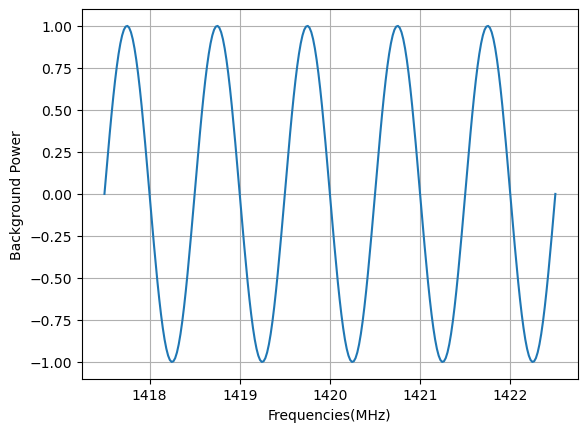

In [5]:
##Step 1, 2, 3

import numpy as np
import matplotlib.pyplot as plt

#choose number of samples

num_samples = 256

#frequency range(in MHz)

start_freq = 1417.5
end_freq = 1422.5

#generate frequency axis
frequencies = np.linspace(start_freq, end_freq, num_samples)


#background signal = sin(2*π*f)
background = np.sin(2*np.pi*(frequencies-start_freq))


# plot the graph of power to frequencies
plt.plot(frequencies, background)
plt.xlabel("Frequencies(MHz)")
plt.ylabel("Background Power")
plt.grid(True)
plt.show()

In [6]:
##Moving to step 4 where we add Gaussian Noise to the background signal

#100 steps(arbitrary number)
number_of_steps = 100

#std_diviation
noise_std = 0.05


#noisy signal for each time segment(background + noise)
noisy_signals = []

#loop through every step
for step in range(number_of_steps):

    #add noise to the background signal
    noise = np.random.normal(loc = 0, scale = noise_std, size = background.size)

    #noisy signal
    noisy_signal = background + noise

    #append noisy signal to the array of noisy signals
    noisy_signals.append(noisy_signal)


signal_matrix = np.array(noisy_signals)

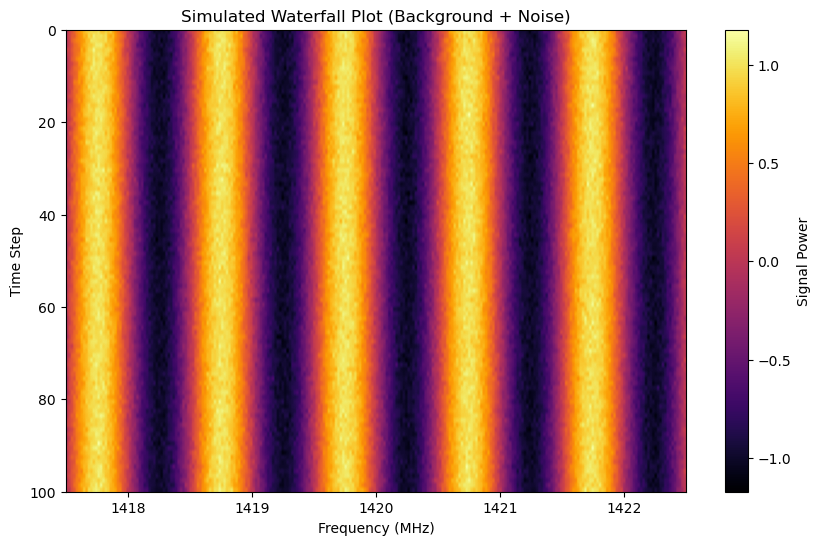

In [7]:
##step 5, 6

plt.figure(figsize=(10, 6))

#heatmap creation

plt.imshow(
    signal_matrix,
    aspect='auto',
    cmap='inferno',  
    extent=[frequencies[0], frequencies[-1], number_of_steps, 0]
)
plt.colorbar(label='Signal Power')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Step')
plt.title('Simulated Waterfall Plot (Background + Noise)')
plt.savefig("waterfall_plot.png", dpi=300)

plt.show()

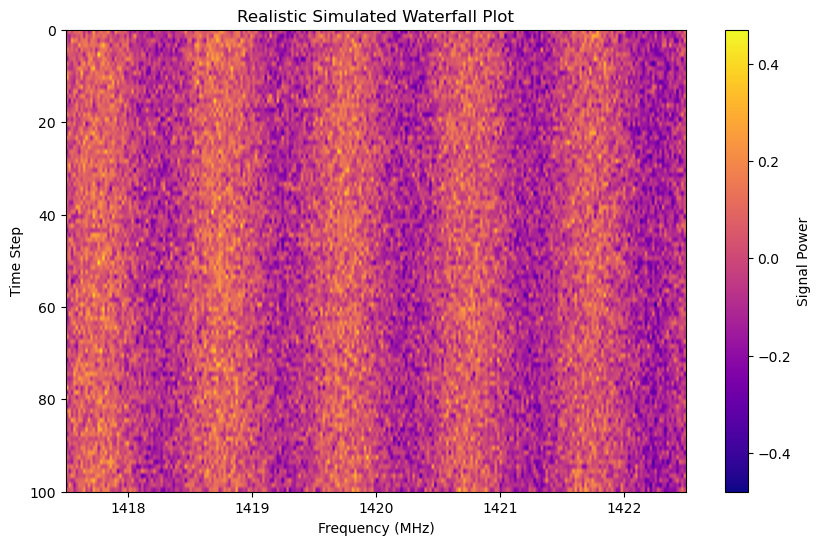

In [14]:
##Step 7
#Steps to make the signal look more realistic 
   #1)Change the background signal to something more realistic, not just a sin function
   #2)Increase the noise levels


noise_std = 0.1

#background_signal = 0.1sin(2π(f - fstart))-0.002*(f-fstart)^2
background = (
    0.1 * np.sin(2 * np.pi * (frequencies - 1417.5)) +
    -0.002 * (frequencies - 1417.5)**2 
)

#Same process as before


noisy_signals = []

for step in range(number_of_steps):
    noise = np.random.normal(0, noise_std, size=background.shape)
    noisy_signal = noise + background
    noisy_signals.append(noisy_signal)

signal_matrix_real = np.array(noisy_signals)


plt.figure(figsize=(10, 6))
plt.imshow(
    signal_matrix_real,
    aspect='auto',
    cmap='plasma',  # Try a different colormap if you want
    extent=[frequencies[0], frequencies[-1], number_of_steps, 0]
)
plt.colorbar(label='Signal Power')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time Step')
plt.title('Realistic Simulated Waterfall Plot')
plt.show()

